In [298]:
%matplotlib inline
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.colors import DivergingNorm
from os.path import exists

In [264]:
dir_path = '/Users/osipova/Documents/LabDocs/Bird_transcriptomics/Transcriptome_for_NectarGenomics/Enrichment_tests/'

In [290]:
# load data
tissue = 'pectoralis'
tissue = 'liver'
tissue = 'duodenum'
tissue = 'heart'

sp = 'Annas_hummingbird'
# sp = 'New_Holland_honeyeater'
# sp = 'rainbow_lorikeet'

file_name = 'enrichr_results.GO.{}.{}.tsv'.format(tissue, sp)
file_data = glob(dir_path + file_name)[0]
df = pd.read_csv(file_data, sep='\t')
df.set_index('term', inplace=True)

## make down values negative
df['down_odds'] = -df['down_odds']
df['down_pval'] = -df['down_pval']
df

,up_pval,up_odds,down_pval,down_odds
term,,,,
Pyruvate metabolism and citric acid (TCA) cycle,0.049280,12.530159,NaN,NaN
Pyruvate dehydrogenase (PDH) complex regulation,0.082584,29.017621,NaN,NaN
HIF-1 transcriptional activity in hypoxia,0.121839,7.179964,-0.729275,-1.329690
Tricarboxylic acid (TCA) cycle,0.121839,9.979772,NaN,NaN
Actin cytoskeleton regulation,0.121839,3.669475,NaN,NaN
Signaling events mediated by T cell protein tyrosine phosphatase (TC-PTP),0.121839,9.190498,-0.664186,-2.110612
Y branching of actin filaments,0.126807,14.502203,NaN,NaN
Tricarboxylic acid (TCA) cycle and respiratory electron transport,0.126807,4.743967,NaN,NaN
Angiopoietin receptor Tie2-mediated signaling,0.126807,7.758112,NaN,NaN


/Users/osipova/local/Homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  from ipykernel import kernelapp as app
/Users/osipova/local/Homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  app.launch_new_instance()


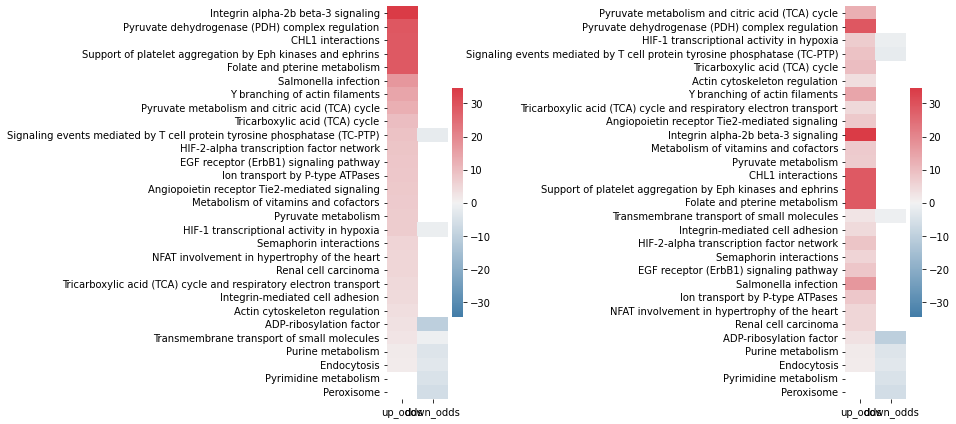

In [292]:
## Plot p-values / Odds ratio as a heatmap

df_pval = df[['up_pval', 'down_pval']]
df_odds = df[['up_odds', 'down_odds']]

df_odds_sorted = df_odds.sort_values(['up_odds', 'down_odds'], ascending=[False, False])
df_odds_sorted_pval = df.sort_values(['up_pval', 'down_pval'], ascending=[True, True])[['up_odds', 'down_odds']]

fig, axes = plt.subplots(1, 2, figsize=(13, 6))
ax1, ax2 = axes[0], axes[1]

lim_odds = max(df_odds['up_odds'].max(), (-df_odds['down_odds']).max())
lim_pval = max(df_pval['up_pval'])
cmap = sns.diverging_palette(240, 10, as_cmap=True)
divnorm_odds = DivergingNorm(vcenter=0, vmin=-lim_odds, vmax=lim_odds)
divnorm_pval = DivergingNorm(vcenter=0, vmin=-lim_pval, vmax=lim_pval)

sns.heatmap(ax=ax1, data=df_odds_sorted, cmap=cmap, norm=divnorm_odds)
sns.heatmap(ax=ax2, data=df_odds_sorted_pval, cmap=cmap, norm=divnorm_odds)
# sns.heatmap(ax=ax2, data=df_pval, cmap=cmap, norm=divnorm_pval)
ax1.set_ylabel('')
ax2.set_ylabel('')
# ax2.set(yticklabels=[])

fig.tight_layout()
plt.subplots_adjust(wspace=5, hspace=5)

plot_name = 'enrichR_DESeq_results.{}.{}.pdf'.format(sp, tissue)
plt.savefig(plot_name, format='pdf')

In [296]:
## aBSREL EnrichR analysis
dir_path = '/Users/osipova/Documents/LabDocs/NectarivoryProject/absrel/absrel_analysis_2021/Enrichr/'

In [325]:
file_names = ['enrichr_results.GO.at_least_3.tsv',
              'enrichr_results.GO.all_clades.uncorr_pval.tsv',
              'enrichr_results.GO.intersect_all_clades.tsv',
                  'enrichr_results.GO.all_clades.tsv']
dfs = []
for f in file_names:
    f_data = glob(dir_path + f)[0]
    df = pd.read_csv(f_data, sep='\t')
    df.set_index('term', inplace=True)
    dfs.append(df)
    
dfs[1].head()

,pval1,odds1,pval2,odds2,pval3,odds3,pval4,odds4
term,,,,,,,,
PDGF genes and receptors,0.110095,10.213542,0.102171,11.064225,0.101347,11.160227,0.002590,37.082707
Platelet amyloid precursor protein pathway,0.002200,13.996192,NaN,NaN,0.024574,9.323362,0.172155,5.681072
Cardiac protection against reactive oxygen species,0.192545,5.105469,0.179313,5.530704,NaN,NaN,0.009085,16.477026
Acute myocardial infarction,0.055902,5.685234,0.301890,2.909563,0.004973,9.897479,0.236575,3.885866
Renin-angiotensin system,0.281489,3.189941,0.003159,11.916228,0.261291,3.485618,0.205015,4.615169


/Users/osipova/local/Homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  """
/Users/osipova/local/Homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  import sys


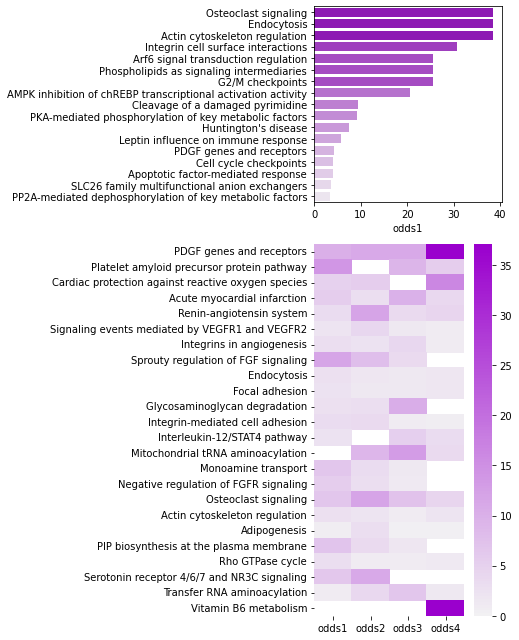

In [327]:
## Plot Odds ratio as a heatmap
fig, axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 1.9]}, figsize=(7.2, 9))

cmap = sns.diverging_palette(250, -70, 123, 35, as_cmap=True)
divnorm_odds = DivergingNorm(vcenter=0)
cmap_pval = sns.diverging_palette(10, 240, as_cmap=True)
divnorm_pval = DivergingNorm(vcenter=np.log10(0.05))

for i in range(2):
    df = dfs[i]
    pval_cols = [i for i in df.columns if i.startswith('pval')]
    odds_cols = [i for i in df.columns if i.startswith('odds')]
    df_pval = df[pval_cols]
    df_odds = df[odds_cols]
    
    axi = axes[i]   
    if i == 0:
        df_odds_sorted = df_odds.sort_values(odds_cols, ascending=[False] * len(odds_cols))
        r = [int(i) for i in list(df_odds_sorted.rank(method='max')['odds1'])]
        p = sns.diverging_palette(250, -70, 123, 35, as_cmap=False, n=len(r)*2+1)[len(r):]
        p_ranked = [p[i] for i in r]
        sns.barplot(ax=axi, data=df_odds_sorted, x='odds1', y=df_odds.index, palette=p_ranked)
    else:
        sns.heatmap(ax=axi, data=df_odds, cmap=cmap, norm=divnorm_odds)
#         sns.heatmap(ax=axi, data=np.log10(df_pval), cmap=cmap_pval, norm=divnorm_pval)
    axi.set_ylabel('')

fig.tight_layout()

plot_name = 'enrichR_absrel_results.at_least_3.topPlot.pdf'
# plt.savefig(plot_name, format='pdf')